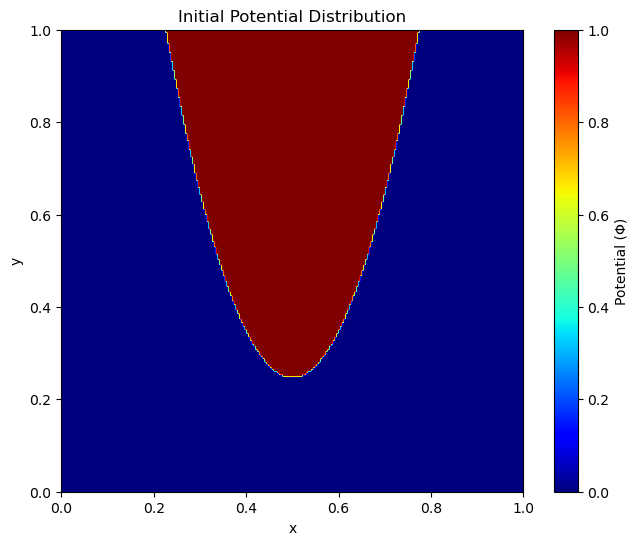

In [76]:
import numpy as np
import matplotlib.pyplot as plt

# Parabolic tip parameters
x_tip, y_tip, R = 0.5, 0.25, 0.05
# Grid initialization
N = 257

# defining the parabolic function for the position of the metal tip
# returns the y-pos by taking x-pos as value ( between [0,1] )
def y(x):
    return ( (x - x_tip)**2 / (2 * R) + y_tip )


# creating the grid and applying Dirichlet BC
Phi = np.zeros((N, N)) # 257*257 grid

Phi[:, -1] = 1  # Top boundary (Phi = 1)
Phi[:, 0] = 0   # Bottom boundary (Phi = 0)

# von-Neumann boundary has not been applied seperately.

#  filling up values in the phi grid 
for i in range(N):
    h = 1 / (N - 1)
    x = i * h # current x-position
    
    y_tip_shape =  y(x)# calculate corresponding y-pos
    j_tip = int(y_tip_shape / h) # index corresponding to the y-position
    
    # setting values of phi between y = [j_tip, 256] as 1 (within the range of tip potential)
    if j_tip < N:
        Phi[i, j_tip:] = 1  # Set parabolic tip potential
    
    # for values where the j_tip exceeds 256, i.e, x<0.2 or x>0.8, we have taken care of those by predefining the Dirichlet BC as phi(y=1) = 1 


# Visualization of the initial grid
plt.figure(figsize=(8, 6))
plt.imshow(Phi.T, origin='lower', extent=[0, 1, 0, 1], cmap='jet')
plt.colorbar(label='Potential (Φ)')
plt.title('Initial Potential Distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

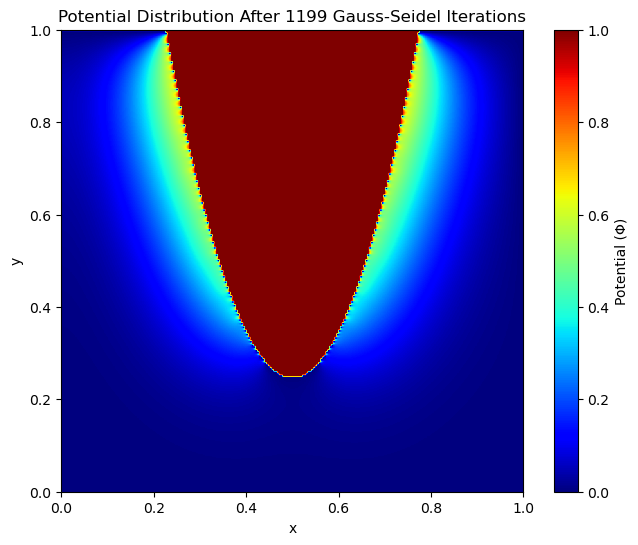

In [75]:


# Gauss-Seidel Relaxation (Run for 1000 iterations without residuum check)
for iteration in range(1200):
        
    for i in range(0, 257-1):  # x index from 0 to 256
        h = 1 / (N - 1)
        x = i * h
            
        y_tip_shape =  y(x)
        j_tip = int(y_tip_shape / h)

        if j_tip >= 257: # out of bounds
            j_tip = 256     
            
        for j in range(1, j_tip-1):  # GS only in range where phi can relax
            # print(i, j)
            if i == 0: # for x = 0
                Phi[i, j] = 0.25 * (Phi[i+1, j] + Phi[i, j] + Phi[i, j+1] + Phi[i, j-1])
            elif i == N: # for x = 1
                Phi[i, j] = 0.25 * (Phi[i, j] + Phi[i-1, j] + Phi[i, j+1] + Phi[i, j-1])
            else:
                Phi[i, j] = 0.25 * (Phi[i+1, j] + Phi[i-1, j] + Phi[i, j+1] + Phi[i, j-1])
        
# Visualization of the relaxed potential

plt.figure(figsize=(8, 6))
plt.imshow(Phi.T, origin='lower', extent=[0, 1, 0, 1], cmap='jet')
plt.colorbar(label='Potential (Φ)')
plt.title(f'Potential Distribution After {iteration} Gauss-Seidel Iterations')
plt.xlabel('x')
plt.ylabel('y')
plt.show()            